In [3]:
# import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from keras.layers import Dense, Flatten, AveragePooling2D, Dropout
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam

Text(0.5, 1.0, 'Diseased Cotton Leaf')

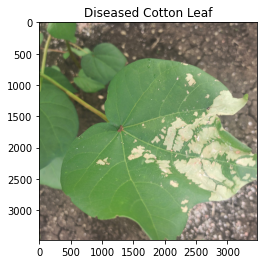

In [8]:
# Check images
img = cv2.imread("Datasets/test/diseased cotton leaf/dis_leaf (124).jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Diseased Cotton Leaf")

Text(0.5, 1.0, 'Fresh Cotton Leaf')

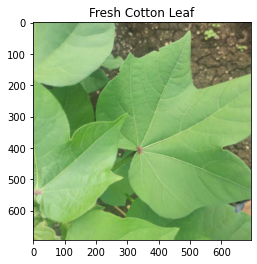

In [9]:
# Check images
img = cv2.imread("Datasets/test/fresh cotton leaf/d (122)_iaip.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Fresh Cotton Leaf")

Text(0.5, 1.0, 'Diseased Cotton Plant')

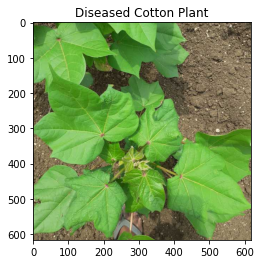

In [11]:
# Check images
img = cv2.imread("Datasets/test/diseased cotton plant/dd (16)_iaip.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Diseased Cotton Plant")

Text(0.5, 1.0, 'Fresh Cotton Plant')

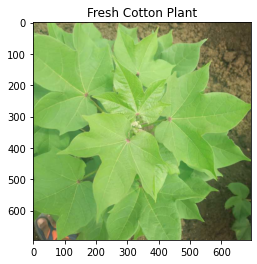

In [12]:
# Check images
img = cv2.imread("Datasets/test/fresh cotton plant/dsd (140)_iaip.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title("Fresh Cotton Plant")

In [13]:
train_generator= ImageDataGenerator(rescale=1./255,  shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_generator= ImageDataGenerator(rescale=1./255,  shear_range=0.2, zoom_range=0.2, horizontal_flip=True)

In [14]:
train_data = train_generator.flow_from_directory( 'Datasets/train', target_size=(224, 224),
        batch_size=64)
test_data = test_generator.flow_from_directory( 'Datasets/test', target_size=(224, 224),
        batch_size=64)

Found 1041 images belonging to 4 classes.
Found 106 images belonging to 4 classes.


In [15]:
train_data.class_indices

{'diseased cotton leaf': 0,
 'diseased cotton plant': 1,
 'fresh cotton leaf': 2,
 'fresh cotton plant': 3}

In [16]:
# Model creation with changes

model = VGG16(input_shape=(224,224,3),include_top=False)

for layer in model.layers:
    layer.trainable = False

newModel = model.output
newModel = AveragePooling2D()(newModel)
newModel = Flatten()(newModel)
newModel = Dense(128, activation="relu")(newModel)
newModel = Dropout(0.5)(newModel)
newModel = Dense(4, activation='softmax')(newModel)

model = Model(inputs=model.input, outputs=newModel)


58892288/58889256 [==============================] - 33s 1us/step


In [17]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [18]:
opt=Adam(learning_rate=0.001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
history = model.fit(train_data,
                              validation_data=test_data,
                              epochs=10)

Epoch 1/10
17/17 [==============================] - 274s 16s/step - loss: 1.2622 - accuracy: 0.4381 - val_loss: 0.7133 - val_accuracy: 0.6887
Epoch 2/10
17/17 [==============================] - 252s 15s/step - loss: 0.6763 - accuracy: 0.7017 - val_loss: 0.4467 - val_accuracy: 0.7736
Epoch 3/10
17/17 [==============================] - 258s 15s/step - loss: 0.4688 - accuracy: 0.8110 - val_loss: 0.4538 - val_accuracy: 0.8113
Epoch 4/10
17/17 [==============================] - 253s 15s/step - loss: 0.4578 - accuracy: 0.8163 - val_loss: 0.3364 - val_accuracy: 0.8491
Epoch 5/10
17/17 [==============================] - 264s 16s/step - loss: 0.3496 - accuracy: 0.8768 - val_loss: 0.3141 - val_accuracy: 0.8585
Epoch 6/10
17/17 [==============================] - 284s 17s/step - loss: 0.3286 - accuracy: 0.8899 - val_loss: 0.3322 - val_accuracy: 0.8774
Epoch 7/10
17/17 [==============================] - 269s 16s/step - loss: 0.2988 - accuracy: 0.8814 - val_loss: 0.2923 - val_accuracy: 0.8868
Epoch 

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=range(len(acc))

Text(0.5, 1.0, 'Training and Validation Accuracy')

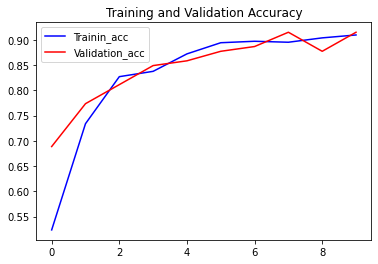

In [21]:
plt.plot(epochs,acc,label='Trainin_acc',color='blue')
plt.plot(epochs,val_acc,label='Validation_acc',color='red')
plt.legend()
plt.title("Training and Validation Accuracy")

Text(0.5, 1.0, 'Training and Validation loss')

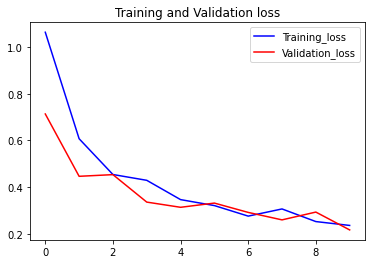

In [22]:
plt.plot(epochs,loss,label='Training_loss',color='blue')
plt.plot(epochs,val_loss,label='Validation_loss',color='red')
plt.legend()
plt.title("Training and Validation loss")

In [23]:
class_dict = {0:'diseased cotton leaf',
              1:'diseased cotton plant',
              2:'fresh cotton leaf',
              3:'fresh cotton plant' }

diseased cotton leaf


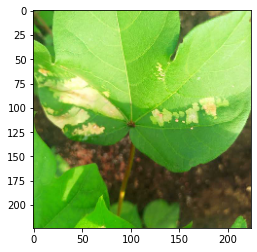

In [24]:
# New Data for testing 

file_path =  'Datasets/test/diseased cotton leaf/dis_leaf (153)_iaip.jpg'
test_image = cv2.imread(file_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print(pred_class)


diseased cotton plant


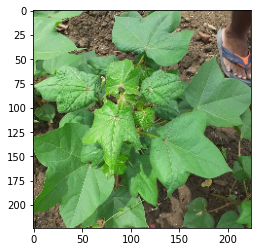

In [25]:
file_path =  'Datasets/test/diseased cotton plant/dd (885)_iaip.jpg'
test_image = cv2.imread(file_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print(pred_class)


fresh cotton leaf


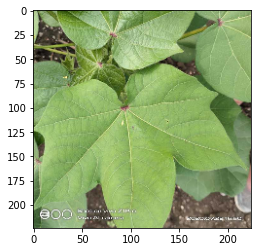

In [26]:
file_path =  'Datasets/test/fresh cotton leaf/d (133)_iaip.jpg'
test_image = cv2.imread(file_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print(pred_class)

fresh cotton plant


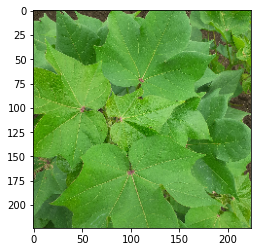

In [27]:
file_path =  'Datasets/test/fresh cotton plant/dsd (223).jpg'
test_image = cv2.imread(file_path)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (224,224),interpolation=cv2.INTER_CUBIC)
plt.imshow(test_image)
test_image = np.expand_dims(test_image,axis=0)
probs = model.predict(test_image)
pred_class = np.argmax(probs)

pred_class = class_dict[pred_class]

print(pred_class)

In [28]:
model.save("Cotton_Disease.h5")